In [1]:
# Init OpenCV
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from CameraProjections import *

Centered at [89, -135]
red [89.0, -175.0] [0.18922910032353601, -200.0] (222, 253)
red [89.0, -175.0] [0.18922910032345144, -200.0] (222, 253)
orange [89.0, -160.0] [0.12040010277891154, -192.0] (238, 263)
orange [89.0, -160.0] [0.12040010277890464, -192.0] (238, 263)
yellow [89.0, -145.0] [0.04863053541488086, -185.0] (257, 269)
yellow [89.0, -145.0] [0.04863053541485903, -185.0] (257, 269)
[-0.012340714939826984, -0.012340714939826986, 0.9998476951563912] [0.012340714939826984, 0.012340714939826986, -0.9998476951563912] 0.169127508168 0.830872491832 -1.0
[-0.012340714939826984, -0.012340714939826986, 0.9998476951563912] [0.012340714939826986, 0.012340714939826986, -0.9998476951563913] 0.169127508168 0.830872491832 -1.0
green [89.0, -130.0] [0.02434920795913552, 2.0] (277, 270)
green [89.0, -130.0] [0.02434920795913852, 2.0] (277, 270)
cyan [89.0, -115.0] [0.09672137700982082, 10.0] (296, 265)
cyan [89.0, -115.0] [0.09672137700983276, 10.0] (296, 265)
blue [89.0, -100.0] [0.1667123561

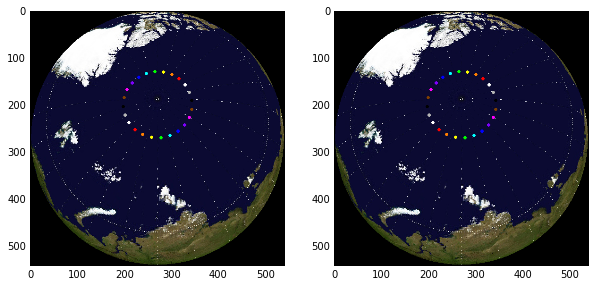

In [6]:
alt = 50

centerLat = 89 # center latitude
centerLong = -135

startLong = -175
longStep = 15
endLong = 175

alternateClBy = 0

centerData = prePolarDistance(alt,  centerLat ,centerLong)
centerData2 = preLatLong(alt, centerLat, centerLong)

img = cv2.imread('../EARTH_650_86_0.png')
#img = cv2.imread('Alt1500.png') # 1500 km
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w = img.shape[:2]

img_direct = img.copy()
img_converted = img.copy()
i = 0
alternateIndex = -alternateClBy
colors = [
    (255,0,0), (255,127,0), (255,255,0), (0,255,0), (0,255,255), (0,0,255), (127,0,255), (255,0,255),
    (127, 63, 0), (0,0,0), (182,182,182), (255,255,255)
]
colorLabels = ["red", "orange", "yellow", "green", "cyan", "blue", "purple", "pink", "brown", "black", "gray", "white"]
print "Centered at", [centerLat, centerLong]

for llong in range(startLong, endLong+1, longStep):
    pair = [centerLat + alternateIndex, llong]
    alternateIndex *= -1
    mag, ang = polarDistance(pair[0], pair[1], centerData)
    
    coords_direct = (   int(round(math.cos(radians(ang))/2.*mag * w + w/2.)), \
                        int(round(-math.sin(radians(ang))/2.*mag * h + h/2.))     )
    
    LL = latLong(mag, ang, centerData2)
    mag2, ang2 = polarDistance(LL[0], LL[1], centerData)
    
    coords_converted = (   int(round(math.cos(radians(ang2))/2.*mag2 * w + w/2.)), \
                           int(round(-math.sin(radians(ang2))/2.*mag2 * h + h/2.))     )
    
    img_direct = cv2.circle(img_direct,coords_direct,2,colors[i],2)
    img_converted = cv2.circle(img_converted,coords_converted,2,colors[i],2)
    #print ang, (ang/180.*math.pi), math.cos(ang/180.*math.pi), math.sin(ang/180.*math.pi)
    print colorLabels[i], [round(pair[0]),round(pair[1])], [mag,round(ang)], coords_direct
    print colorLabels[i], [round(LL[0]),round(LL[1])], [mag2,round(ang2)], coords_converted
    i = (i+1)%len(colors)

fig, plts = plt.subplots(1, 2, figsize=(10,7))
plts[0].imshow(img_direct)
plts[1].imshow(img_converted)